# Menyra e punes

Ekzekutoni qelizat SIPAS RRADHES dhe njera pas tjetres.

# Lekundesi suste i lire dhe ne prani te ferkimit

Ne konsiderojme lekundesin suste te lire dhe ne prani te ferkimit.

Nje pike materiale me mase $m$ lidhet me nje suste ideale pa mase dhe me konstante $k$, shmanget nga pozicioni i ekuilibrit me madhesine $x_0$. Objekti fillon levizjen me shpejtesi fillestare $v_0$. Pika materiale leviz ne mjedisin fluid me koeficient viskoziteti $\eta$, nderohe qe koeficienti i ferkimit eshte $b_l= K\eta$

$$\Omega_0=\sqrt{k/m}$$

$$T_0=2\pi/\Omega_0$$

$$\gamma=(b_l/2m)$$

Ekuacioini diferencial i levizjes eshte:

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = 0$$

Ekuacioni karakteristik perkates eshte

$$\lambda^2+2\gamma \lambda+\Omega_0^2=0$$

ku percaktori eshte $\Delta '=(\gamma^2-\Omega_0^2)$

Nese $\Delta ' \neq 0$, zgjidhjet e ekucionit jane:

$$\lambda_1=-\gamma +(\Delta ')^{0.5}$$

$$\lambda_2=-\gamma -(\Delta ')^{0.5}$$

Zgjidhjet e ekuacionit diferencial kane trajten

$$x_c(t)=C_1 e^{\lambda_1 t}+C_2 e^{\lambda_2 t}$$

Zevendesimi i kushteve fillestare sjell 
$$C_1=\frac{\lambda_2 x_0 - v_0}{\lambda_2-\lambda_1}$$

$$C_2=\frac{\lambda_1 x_0 - v_0}{\lambda_1-\lambda_2}$$

Kujdes! $\lambda_1$ et $\lambda_2$, $C_1$ dhe $C_2$ jane komplekse.

Zgjidhja fizike eshte pjesa reale e $x_c$.

Nese $\Delta ' = 0$, zgjidhja eshte pjesa reale e

$$x_c(t)=[x_0+(v_0+\gamma x_0)t ]e^{-\gamma t}$$



In [ ]:
import numpy as np
from cmath import *

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, show, ColumnDataSource

from bokeh.io import push_notebook, show, output_notebook
from ipywidgets import interact
#from bokeh.resources import INLINE 

output_notebook()

#### Perkufizimi i funksioneve te rendesishme

In [ ]:
def omega0(k,m):
    oz=np.sqrt(k/m)
    return oz

def gamma(bl,m):
    ga=bl/(2*m)
    return ga

def fac_qual(k,m,bl):
    fq = np.sqrt(k*m)/bl
    return fq

def deltaprime(k,m,bl):
    dp=gamma(bl,m)**2-omega0(k,m)**2+0j
    return dp

def osciamo(k,m,bl,xzero,vzero,t):
    if (deltaprime(k,m,bl)!=0):
        gamma1=-gamma(bl,m)+deltaprime(k,m,bl)**(1/2)
        gamma2=-gamma(bl,m)-deltaprime(k,m,bl)**(1/2)
        C1=(gamma2*xzero-vzero)/(gamma2-gamma1)
        C2=(gamma1*xzero-vzero)/(gamma1-gamma2)
        solc=C1*np.exp(gamma1*t)+C2*np.exp(gamma2*t)
        sol=solc.real
    else:
        sol=(xzero+(vzero+gamma(bl,m)*xzero)*t)*np.exp(-gamma(bl,m)*t)
    return sol    
    

#### Percaktimi detajeve te figures

In [ ]:
p = figure(width=800, height=400)

# Vlerat fillestare
k=50
m=5
bl=0
xzero=1
vzero=0

t = np.linspace(0,40,1000)
x1 = osciamo(k,m,bl,xzero,vzero,t)
expga = np.exp(-gamma(bl,m)*t)

pos = p.line(t,x1,line_width=3,legend_label="position")
ga = p.line(t,expga,color="orange",line_width=2,legend_label="exp(-gamma*t)")

p.legend.location = "top_right"
p.legend.click_policy="hide"


def update(m=5, k = 50, bl = 0): #, xzero= 1 , vzero = 0):
    pos.data_source.data['y'] = osciamo(k,m,bl,xzero,vzero,t)
    ga.data_source.data['y'] = np.exp(-gamma(bl,m)*t)
    push_notebook()
    print('Omega_0 = {:0.2f}[rad/s]'.format(omega0(k,m)),",  gamma = ", gamma(bl,m)) 
    dp =  deltaprime(k,m,bl)**0.5
    dpr = dp.real
    dpi = dp.imag
    print('-')
    print('Partie réelle de racine de delta prime {:0.2f}[rad/s]'.format(dpr))
    print('-')
    print('Partie imaginaire de racine de delta prime {:0.2f}[rad/s]'.format(dpi))


## Let's Play!

Kjo figure paraqet evolucionin kohor te $x(t)$. Aty paraqitet gjithashtu dhe mbeshtjella eksponenciale e lekundjeve qe shuhen $e^{-\gamma t}$

Cfare vrojtojme kur ndryshojme tre parametrat $m$, $k$ dhe $b_l$ ?

Studioni si varion $\Omega_0$ ne lidhje me $\gamma$, dhe cfare perfaqesojne pjesa reale dhe ajo imagjinare e determinantit $\Delta'$

In [ ]:
show(p, notebook_handle=True)
interact(update, m = (1,10,1), k = (1,50,1), bl = (0,200,1));

# Lekundjet e detyruara

Ne vijim perdorim te njejtat shenime, por kete here lavjerresi eshte nen veprimin e nje force te jashtme $F_0 \cos (\omega_e t)$

Kjo force e jashtme eshte e perftuar nga zhvendosja sinusoidale e nje membrane me amplitude $x_{e,0}$. Per rrjedhoje, amplituda e forces se jashtme eshte $F_0=k x_{e,0}$ dhe zhvendsja prej kesaj force do te jete

$$\frac{F_0}{k}\cos(\omega_e t)$$

Ekuacioni diferencial i levizjes shkruhet

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = (F_0/m) \cos (\omega_e t)$$

Duke perdorur shenimin kompleks me $f=F_0/m$

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = f e^{i\omega_e t}$$

Zgjidhja e vecante e ekuacionit diferencial eshte $x_{1,c}(t)= \chi_0 e^{i\omega_e t}$ avec $\chi_0=A e^{i \varphi}$. $A(\omega_e)$ eshte amplituda dhe $\varphi(\omega_e)$ eshte faza.

$$\chi_0 = \frac{f}{-(\omega_e^2-\Omega_0^2)+i(2\gamma\omega_e)}$$

Zgjidhja e pergjithshme eshte shuma e zgjidhjes se vecante me zgjidhjen e pergjithshme te ekuacionit te lekundjeve te lira ne paragrafin e mesiperm ($x_{2,c}(t)$).

Konstantet e integrimit $C_1$ dhe $C_2$ percaktohen sipas kushteve $x_{c}(t)=x_{1,c}(t)+x_{2,c}(t)$

#### Perkufizimi i funksioneve

In [ ]:
#amplitude de l'excitation
def exci(omegae,k,f,t):
    ex=(f/k*m)*np.cos(omegae*t)
    return ex

def chizero(omegae,k,m,bl,f):
    chizero=f/complex((omega0(k,m)**2-omegae**2),(2*gamma(bl,m)*omegae))
    return chizero

#Fonctions pour calculer les amplitudes et déphasages pour une série de pulsation d'escitation
# L'amplitude est divisée par f*m/m afin de la normaliser à l'amplitude d'excitation
def amplitudes(k,m,bl,f,omegae_v):
    amp=[]
    for i in omegae_v:
        amp.append(abs(chizero(i,k,m,bl,f))*(k/(f*m)))
    return amp

def dephasages(k,m,bl,f,omegae_v):
    deph=[]
    for i in omegae_v:
        deph.append(phase(chizero(i,k,m,bl,f)))
    return deph

#x1(t) complexe
def regpermc(omegae,k,m,bl,f,t):
    rp=chizero(omegae,k,m,bl,f)*complex(np.cos(omegae*t),np.sin(omegae*t))
    return rp

#x2(t) complexe, avec C1 et C2 déterminés grace à x0 et v0
def xdeuxdetc(omegae,k,m,bl,f,xzero,vzero,t):
    if (deltaprime(k,m,bl)!=0):
        gamma1=-gamma(bl,m)+deltaprime(k,m,bl)**(1/2)
        gamma2=-gamma(bl,m)-deltaprime(k,m,bl)**(1/2)
        C1=(gamma2*xzero-vzero-gamma2*chizero(omegae,k,m,bl,f)+(0+1j)*chizero(omegae,k,m,bl,f)*omegae)/(gamma2-gamma1)
        C2=(gamma1*xzero-vzero-gamma1*chizero(omegae,k,m,bl,f)+(0+1j)*chizero(omegae,k,m,bl,f)*omegae)/(gamma1-gamma2)
        sol=C1*np.exp(gamma1*t)+C2*np.exp(gamma2*t)
    else:
        A=xzero-chizero(omegae,k,m,bl,f)
        B=vzero+gamma(bl,m)*xzero-gamma(bl,m)*chizero(omegae,k,m,bl,f)-(0+1j)*chizero(omegae,k,m,bl,f)*omegae
        sol=(A+B*t)*np.exp(-gamma(bl,m)*t)
    return sol    
    


#### Ndertimi i figures

In [ ]:
p2 = figure(width=950, height=400,y_range=(-1, 1))

# Vlerat fillestare (lavjerresi ne ajer, uje dhe vaj)
# mjedisi (k,m,bl,f,xzero,vzero)

air = (15,0.19,0.02,1,0,0)
fluide1 = (15,0.19,0.05,1,0,0)
eau = (15,0.19,0.3,1,0,0)
huile = (15,0.19,1.5,1,0,0)

choix = eau
k = choix[0]
m = choix[1]
bl = choix[2]
f = choix[3]
xzero = choix[4]
vzero = choix[5]
omegae = 7.1 # Ngacmimi
tmin = 0
tmax = 1000

t2 = np.linspace(0,50,1000)
omegae_v1 = np.linspace(5,15,2000)

def permreal(omegae,k,m,bl,f,t):
    pr=[]
    for i in t:
        pr.append(regpermc(omegae,k,m,bl,f,i).real)
    pr=np.array(pr)
    return pr

def x2real(omegae,k,m,bl,f,xzero,vzero,t):
    x2r=[]
    for i in t:
        x2r.append(xdeuxdetc(omegae,k,m,bl,f,xzero,vzero,i).real)
    x2r=np.array(x2r)
    return x2r


excitation = p2.line(t2,exci(omegae,k,f,t2),line_width=3 ,alpha=0.7, legend_label="excitation")
amorti = p2.line(t2,x2real(omegae,k,m,bl,f,xzero,vzero,t2),color="green",alpha=0.7,line_width=3,legend_label="x2 : solution générale de l'équation SSM")
total = p2.line(t2,permreal(omegae,k,m,bl,f,t2)+x2real(omegae,k,m,bl,f,xzero,vzero,t2),color="red",alpha=0.7,line_width=3,legend_label="solution totale")
permanent = p2.line(t2,permreal(omegae,k,m,bl,f,t2),color="black",line_width=1,legend_label="x1 : régime permanent")

p2.legend.location = "top_right"
p2.legend.click_policy="hide"
p2.xaxis.axis_label="temps[s]"

dp = figure(width=400, height=300)
deph=dp.line(omegae_v1,dephasages(k,m,bl,f,omegae_v1),line_width=3)

dp.xaxis.axis_label="omega excitation[rad/s]"
dp.yaxis.axis_label="déphasage[rad]"


deph_vx=np.array([omegae])
deph_vy=np.array([phase(chizero(omegae,k,m,bl,f))])
deph_v=dp.circle(deph_vx,deph_vy,color="red",size=8)

ap = figure(width=400, height=300)
amp=ap.line(omegae_v1,amplitudes(k,m,bl,f,omegae_v1),line_width=3)

ap.xaxis.axis_label="omega excitation[rad/s]"
ap.yaxis.axis_label="Amplitude relative"


amp_vx = np.array([omegae])
amp_vy = np.array([abs(chizero(omegae,k,m,bl,f))*(k/(f*m))])
amp_v = ap.circle(amp_vx,amp_vy,color="red",size=8)

def update2(milieu, omegae=8.3): #, xzero= 1 , vzero = 0):
    if milieu=="eau": choix = eau
    if milieu=="air": choix=air
    if milieu=="huile": choix=huile
    if milieu=="fluide1": choix=fluide1
    k = choix[0]
    m = choix[1]
    bl = choix[2]
    f = choix[3]
    xzero = choix[4]
    vzero = choix[5]
    excitation.data_source.data['y'] = exci(omegae,k,f,t2)
    permanent.data_source.data['y'] = permreal(omegae,k,m,bl,f,t2)
    amorti.data_source.data['y'] = x2real(omegae,k,m,bl,f,xzero,vzero,t2)
    total.data_source.data['y'] = permreal(omegae,k,m,bl,f,t2)+x2real(omegae,k,m,bl,f,xzero,vzero,t2)
    deph.data_source.data['y'] = dephasages(k,m,bl,f,omegae_v1)
    amp.data_source.data['y'] = amplitudes(k,m,bl,f,omegae_v1)
    deph_v.data_source.data['x'] = np.array([omegae])
    deph_v.data_source.data['y'] = np.array([phase(chizero(omegae,k,m,bl,f))])
    amp_v.data_source.data['x'] = np.array([omegae])
    amp_v.data_source.data['y'] = np.array([abs(chizero(omegae,k,m,bl,f))*k/(f*m)])

    push_notebook()


## Let's play !

Ne zgjedhim kater mjedise te ndryshem: ajer, uje, vaj viskoz dhe nje leng me viskozitet te ndermjetem midis ujit dhe vajit.

Figura paraqet pozicionin e lavjerresit ne funksion te kohes duke pasur parasysh kater kontribute, si vijon:

1- forca lekundese e prodhuar nga mekanizmi qe ve ne levizje masen; 

2- zgjidhja e vecante e ekuacionit diferencial;

3- zgjidhja e pergjithshme e ekuacionit homogjen perkates;

4- zgjidhja e pergjithshme qe paraqet regjimin tranzitor dhe vendosjen e regjimit stacionar.

Ne mund te variojme parametrat e forcesdetyruese. Butonat ne te djathte mundesojne zmadhimin dhe zhvendosjen neper grafik.

Dy kurbat ne vijim paraqesin fazen dghe amplituden relative.

In [ ]:
show(column(p2,row(dp,ap)), notebook_handle=True)
interact(update2, omegae = (5,15,.1),milieu=["eau","air","huile","fluide1"]);

# Kurbat e fazes dhe amplitudes

Ketu ne mund te ndryshojme masen, konstanten e sustes, koeficientin e ferkimit dhe te shohim se cfare efekti kane keto ndryshime te kurba e fazes dhe amplitudes relative.

In [ ]:
# Funksioni kthen frekuencen e rezonances, nese ekziston; perndryshe kthen -1
def omegares(k,m,bl):
    orsq=(omega0(k,m))**2-2*(gamma(bl,m))**2
    if orsq > 0 : omegares = np.sqrt(orsq)
    else : omegares= -1
    return omegares   

# Funksioni kthen amplituden, nese ajo ekziston
def ampres(k,m,bl,f):
    ores=omegares(k,m,bl)
    if ores >=0 : ampres = abs(chizero(ores,k,m,bl,f))*(k/(f*m))
    else : ampres = -1
    return ampres


In [ ]:
dp2 = figure(width=450, height=350)
ap2 = figure(width=450, height=350)


# Vlerat fillestare
k=10
m=.1
bl=1
f=1


omegae_v2 = np.linspace(0.01,20,2000)

deph2 = dp2.line(omegae_v2,dephasages(k,m,bl,f,omegae_v2),line_width=3)

amp2 = ap2.line(omegae_v2,amplitudes(k,m,bl,f,omegae_v2),line_width=3)

resonnancex=np.array([omegares(k,m,bl),omegares(k,m,bl)])
resonnancey=np.array([0,ampres(k,m,bl,f)])

dp2.xaxis.axis_label="pulsation d'excitation[rad/s]"
dp2.yaxis.axis_label="déphasage[rad]"
ap2.xaxis.axis_label="pulsation d'excitation[rad/s]"
ap2.yaxis.axis_label="amplitude relative"

ores = ap2.line(resonnancex,resonnancey, color='black')

def update3(k=10, m=.1,bl=1): # f=1
    deph2.data_source.data['y'] = dephasages(k,m,bl,f,omegae_v2)
    amp2.data_source.data['y'] = amplitudes(k,m,bl,f,omegae_v2)
    if (omegares(k,m,bl) > 0 and bl>0):
        ores.data_source.data['x'] = np.array([omegares(k,m,bl),omegares(k,m,bl)])
        ores.data_source.data['y'] = np.array([0,ampres(k,m,bl,f)])
    else  :
        ores.data_source.data['x'] = np.array([0,0])  
        ores.data_source.data['y'] = np.array([0,0])
    
    if omegares(k,m,bl) >=0 : 
        print(' omega_resonnance = {:0.2f}[rad/s]'.format(omegares(k,m,bl)))
    else : print("Pas de résonnance")   
    if bl > 0 : print('facteur de qualité, Q = {:0.2f}'.format(fac_qual(k,m,bl)))
    else : print('le facteur de qualité Q est infini')    
    push_notebook()
    



## Let's play !

Vereni cilesine e rezonances ne funksion te parametrave perkates.

In [ ]:
show(row(dp2,ap2), notebook_handle=True)
interact(update3,k=(1,50,1),m=(.1,1,.1),bl=(0,10,.1));

## Amplituda si funksion i frekuences se reduktuar

Ne kete paragraf ndertohet grafiku i amplitudes ne funksion te frekuences se reduktuar $\omega_e/\Omega_0=X$ dhe faktorit te cilesise $Q$:

$$A(\omega_e)/A(0)=\frac{Q}{\sqrt{Q^2(X^2-1)^2+X^2}}$$

Rezonanca verehet per $X_\text{res}=\sqrt{1-Q^2/2}$

In [ ]:
def AmpQual(Q,X):
    aq = Q/np.sqrt(Q**2*(X**2-1)**2+X**2)
    return aq

ap3 = figure(width=700, height=350)

# Vlera fillestare
Qual=1

Xtab = np.linspace(0.01,3,500)

amp3 = ap3.line(Xtab,AmpQual(Qual,Xtab),line_width=3)

ap3.xaxis.axis_label="pulsation réduite"
ap3.yaxis.axis_label="Amplitude relative"

def update4(Qual=1): #
    amp3.data_source.data['y'] = AmpQual(Qual,Xtab)
    Xressquared=1-1/(2*Qual**2)
    if Xressquared >= 0 : print('X_resonnance = {:0.3f}'.format(np.sqrt(Xressquared)))
    else : print('Pas de résonnance')
    push_notebook()
    


## Let's play

Faktori i vetem te cilin ne mund ta ndryshojme eshte ai i cilesise. Shikoni ku ndodh rezonanca ne raport me $X=1$.

In [ ]:
show(ap3, notebook_handle=True)
interact(update4,Qual=(0.1,50,0.1));

Mendoni rreth disa arsyeve praktike perse mjaft rezonatore punojne deri me ne nje faktor cilesie 50. Nderkohe eshte e mundur te ndertohen mikrorezonatore ne laboratore kerkimore te cilet punojne me faktore cilesie qe tejkalojne $10^7$.

## Pune tipike Laboratori

Ne vijim mund te shohim nje pune laboratori tipike!

## Hyrje teorike

Ne kete pune laboratori analizojme varesine ndermjet intensitetit te rrymes elektrike $I$ qe rrjedh permes nje rezistence $R$ me diferencen potenciale $U$ ne skajet e se njejtes rezistence. Varesia teorike, ne perputhje me ligjin e Omit eshte:

$$ I = \frac{U}{R} .$$

Ketu mund te futen produktet e simulimeve, figura apo video nga mediume te ndryshme, etj.


## Eksperimenti

Varesia eksperimentale do te jete:

$$ I = \frac{U}{R} + I_0 \rightarrow I = aU + b. $$

Ne vijim mund te paraqiten elementet e nevojshme te teorise se gabimit, te ndertohen tabelat qe do te plotesohen gjate matjeve, etj.

## Perpunimi i te dhenave

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.optimize import curve_fit

In [50]:
# Perkufizimi i funksioneve ndihmese
def f(x,a,b):
    return a * x + b

def fitting_I_U(data, string):
    x = data[:,0] - np.mean(data)
    x_err = data[:,1]
    y = data[:,2]
    y_err = data[:,3]
    results = []

    popt, pcov = curve_fit(f, x, y, sigma=y_err)
    
    # Calculate auxiliary quantities
    Sx = np.sum(x)
    Sy = np.sum(y)
    Sxx = np.sum(x ** 2)
    Syy = np.sum(y ** 2)
    Sxy = np.sum(np.multiply(x,y))
    n = np.size(x)
    t_5 = 1.0543
     
    # Calculate errors
    S_eps_2 = (n * Syy - Sy ** 2 - (popt[0] ** 2) * (n * Sxx - Sx ** 2))
    S_b = np.sqrt((n * S_eps_2)/(n * Sxx - Sx ** 2))
    sigma_b = S_b*t_5
    S_a = S_b * np.sqrt(Sxx/n)
    sigma_a = S_a * t_5
    
    # Calculate R^2
    r = (Sxy/n - Sx * Sy/n ** 2)/np.sqrt((Sxx/n - (Sx/n) ** 2) * (Syy/n - (Sy/n) ** 2))
    
    lst = [popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1]), r]
    results.append(lst)        
    res = np.array(results).reshape((1,5))

    # Plotting results
    plt.rc('font', size=14)
    plt.plot(x+np.mean(x), y, 'o', color='k') # Time series
    plt.plot(x+np.mean(x), f(x, *popt), '-', color='r', label=f'calibration factor = {np.round(lst[0],2)} (t - 4.5) + {np.round(lst[2],2)}' ) # The trend
    plt.errorbar(x+np.mean(x), y, xerr = x_err, yerr = y_err, color='k', fmt='none') # Error bars for the x axis
    # plt.fill_between(x, f(x, *popt) - y_err1, f(x, *popt) + y_err1, color = 'r', alpha=0.2, label = '67 % Confidence Interval for block ' + string)
    Sheffe_band(x+np.mean(x), y, string)  
    
    plt.xlabel('Diferenca potenciale U (V)', fontsize = 22, loc = 'right')
    plt.ylabel('Intensiteti i rrymes I (A)', fontsize = 22, loc = 'top')
    plt.title('Ligji i Omit pre nje pjese homogjene te qarkut', fontsize = 26, fontweight = 'bold', loc = 'left')
    plt.grid()
    plt.gcf().set_size_inches(14, 10)
    plt.legend(loc='upper left')
    plt.xlim([np.min(x+np.mean(x))-0.5,np.max(x+np.mean(x))+0.5])
    plt.ylim([np.min(y)-1.0,np.max(y)+1.0])
    plt.text(5, 1, '$\sigma_{cf}^2 \cdot 10^4$ = ' + f'{10000 * np.round(pcov[0,0],5)}' + '$(t - 4.5)^2 +$' + f' {20000 * np.round(np.abs(pcov[0,1]),5)}' + '$(t - 4.5)$' + f' + {10000 * np.round(pcov[1,1],5)}', fontsize = 'x-large')
    return res, pcov

def Sheffe_band(x,y, string):
    XV = x #np.array([1.15, 1.67, 2.05, 2.49, 2.99, 3.33, 3.81])
    n = np.size(XV)
    
    ## Design matrix
    X = np.ones((n,2))
    X[:,1] = XV
    
    ## Observed response values
    Y = y
    
    # Get the coefficient estimates
    u,s,vt = np.linalg.svd(X,0)
    v = np.transpose(vt)
    bhat = np.dot(v, np.dot(np.transpose(u), Y)/s)
    
    # The fitted values
    Yhat = np.dot(X, bhat)
    
    # The MSE and RMSE
    MSE = ((Y-Yhat)**2).sum()/(n-X.shape[1])
    s = np.sqrt(MSE)
    
    # These multipliers are used in constructing the intervals
    XtX = np.dot(np.transpose(X), X)
    V = [np.dot(X[i,:], np.linalg.solve(XtX, X[i,:])) for i in range(n)]
    V = np.array(V)
    
    # The F quantile used in constructing the Scheffe interval
    QF = sp.fdtri(X.shape[1], n-X.shape[1], 0.95)
    QF_2 = sp.fdtri(X.shape[1], n-X.shape[1], 0.68)
    
    # The lower and upper bounds of the Scheffe band
    D = s*np.sqrt(X.shape[1]*QF*V)
    LB,UB = Yhat-D,Yhat+D
    D_2 = s*np.sqrt(X.shape[1]*QF_2*V)
    LB_2,UB_2 = Yhat-D_2,Yhat+D_2
    
    # Complete the plot
    plt.fill_between(XV, LB_2, UB_2, where = UB_2 >= LB_2, facecolor='blue', alpha=0.2, label = '68 % Confidence Interval', zorder = 0)
    plt.plot(XV, LB_2, '-', color='blue', zorder=1)
    plt.plot(XV, UB_2, '-', color='blue', zorder=1)

#### Te dhenat eksperimentale

In [33]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x = x.reshape((np.size(x),1))
x_err = np.array([0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.15, 0.15, 0.1])
x_err = x_err.reshape((np.size(x_err),1))
y = np.array([0.55, 1.03, 1.57, 1.94, 2.43, 3.02, 3.42, 4.10, 4.55])
y = y.reshape((np.size(y),1))
y_err = np.array([0.07, 0.15, 0.09, 0.10, 0.12, 0.06, 0.11, 0.17, 0.13])
y_err = y_err.reshape((np.size(y_err),1))
Data = np.concatenate((x,x_err,y,y_err),axis=1)

#### Percaktimi i koeficienteve te varesise lineare

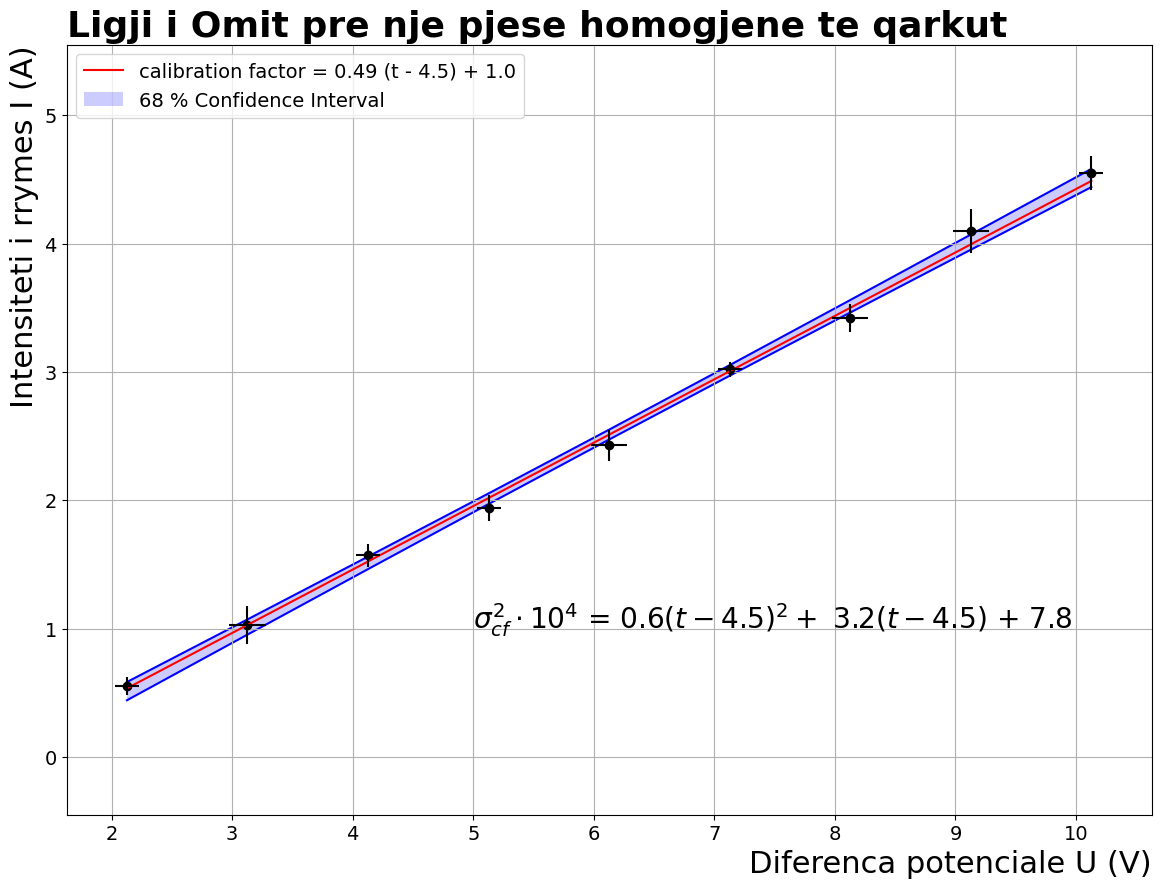

In [51]:
res, pcov = fitting_I_U(Data,'Ohm')
